# Students Performance in Exams - Training

This notebook focuses on predicting students' performance in exams using various regression models. Let's start by importing the necessary libraries and tools.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

## Data Loading and Initial Exploration

Let's start by loading the dataset and taking an initial look at the data.

In [41]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The dataset contains information about students' performance in exams, including their gender, race/ethnicity, parental level of education, lunch type, test preparation course, and scores in math, reading, and writing.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This initial exploration helps us understand the structure of the dataset and the types of features

In [44]:
print(f"Number of the unique values in each column:\n{df.nunique()}")
print(f"\nList of the unique values in gender column:\n{df['gender'].unique()}")
print(f"\nList of the unique values in race/ethnicity column:\n{df['race/ethnicity'].unique()}")
print(f"\nList of the unique values in parental level of education column:\n{df['parental level of education'].unique()}")
print(f"\nList of the unique values in lunch column:\n{df['lunch'].unique()}")
print(f"\nList of the unique values in test preparation course column:\n{df['test preparation course'].unique()}")

Number of the unique values in each column:
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

List of the unique values in gender column:
['female' 'male']

List of the unique values in race/ethnicity column:
['group B' 'group C' 'group A' 'group D' 'group E']

List of the unique values in parental level of education column:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

List of the unique values in lunch column:
['standard' 'free/reduced']

List of the unique values in test preparation course column:
['none' 'completed']


## Data Preprocessing

Now, let's prepare our data for modeling by performing some data preprocessing steps.

In [42]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


We've created a feature matrix X by excluding the 'math score' column from the original dataset. This matrix contains information about gender, race/ethnicity, parental level of education, lunch, test preparation course, reading score, and writing score.

In [45]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

The target variable y is set to the 'math score' column, representing the scores of students in the math exam.

In [46]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

We distinguish between numeric features (e.g., reading score, writing score) and categorical features (e.g., gender, race/ethnicity) and use the ColumnTransformer to apply specific transformations to numeric and categorical features separately. Categorical features are one-hot encoded, and numeric features are standardized using OneHotEncoder and StandardScaler respectively.

These preprocessing steps ensure that our data is in a suitable format for training machine learning models.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Model Evaluation

In this section, we evaluate the performance of various regression models on the dataset.

In [49]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

This code defines a function for model evaluation and then evaluates the performance of various regression models on both the training and test sets. The metrics considered include Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 Score. The results are printed for each model, and the R2 and MSE scores are stored in lists for further analysis.

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
mse_list=[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    mse_list.append(model_test_mse)
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- Mean Squared Error: 28.3349
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- Mean Squared Error: 29.0952
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- R2

## Model Comparison based on MSE Scores

Now, let's compare the models based on Mean Squared Error (MSE) scores.

In [53]:
data = {'Model Name': model_list, 'MSE_Score': mse_list}
mse_scores = pd.DataFrame(data).sort_values(by='MSE_Score', ascending=True)
mse_scores

,Model Name,MSE_Score
2,Ridge,29.056272
0,Linear Regression,29.095170
5,Random Forest Regressor,35.504136
7,CatBoosting Regressor,36.103658
8,AdaBoost Regressor,37.225872
6,XGBRegressor,41.903708
1,Lasso,42.506417
3,K-Neighbors Regressor,53.001000
4,Decision Tree,61.510000


## Linear Regression Model Evaluation

Now, let's evaluate the Linear Regression model's performance on the test set.

In [54]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f"%score)

 Accuracy of the model is 88.04


The R2 score is a measure of how well the linear regression model explains the variance in the target variable. In this case, the model has an accuracy of 88.04%, indicating that it explains 88.04% of the variance in the math scores.

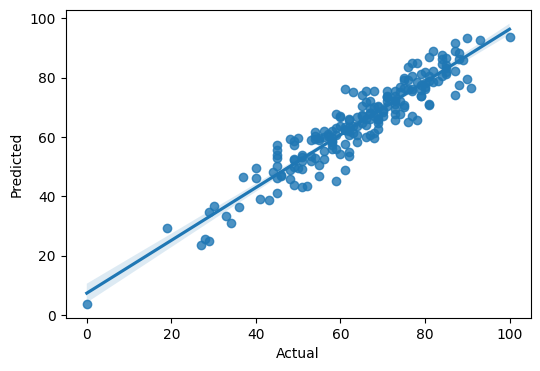

In [55]:
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test,y=y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


The scatter plot with the regression line visually represents how well the predicted values align with the actual values. A perfect alignment would result in a diagonal line, indicating a perfect prediction.

In [56]:
pred_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
